In [1]:
import numpy as np
import matplotlib.pyplot as plt
import svd
from scipy.sparse.linalg import svds

In [2]:
np.random.seed(42)
random_matrix = np.random.rand(4, 12)

print(random_matrix)

[[0.3745 0.9507 0.732  0.5987 0.156  0.156  0.0581 0.8662 0.6011 0.7081 0.0206 0.9699]
 [0.8324 0.2123 0.1818 0.1834 0.3042 0.5248 0.4319 0.2912 0.6119 0.1395 0.2921 0.3664]
 [0.4561 0.7852 0.1997 0.5142 0.5924 0.0465 0.6075 0.1705 0.0651 0.9489 0.9656 0.8084]
 [0.3046 0.0977 0.6842 0.4402 0.122  0.4952 0.0344 0.9093 0.2588 0.6625 0.3117 0.5201]]


In [3]:
p = 3
u, s, vt = np.linalg.svd(random_matrix)
print(u)

[[-0.6077  0.4448 -0.3508 -0.5566]
 [-0.3444 -0.0607  0.9048 -0.2429]
 [-0.5588 -0.7862 -0.2311  0.1276]
 [-0.4471  0.4248  0.0688  0.7842]]


In [4]:
print(s)

[3.2846 1.237  0.9538 0.6859]


In [5]:
print(random_matrix)
print()
print(u @ np.diag(s))

[[0.3745 0.9507 0.732  0.5987 0.156  0.156  0.0581 0.8662 0.6011 0.7081 0.0206 0.9699]
 [0.8324 0.2123 0.1818 0.1834 0.3042 0.5248 0.4319 0.2912 0.6119 0.1395 0.2921 0.3664]
 [0.4561 0.7852 0.1997 0.5142 0.5924 0.0465 0.6075 0.1705 0.0651 0.9489 0.9656 0.8084]
 [0.3046 0.0977 0.6842 0.4402 0.122  0.4952 0.0344 0.9093 0.2588 0.6625 0.3117 0.5201]]

[[-1.996   0.5502 -0.3346 -0.3818]
 [-1.1311 -0.0751  0.863  -0.1666]
 [-1.8354 -0.9724 -0.2204  0.0875]
 [-1.4684  0.5255  0.0657  0.5379]]


[[0.     0.8201 0.5444 0.5114 0.0312 0.0312 0.0045 0.5691 0.3337 0.4265 0.0006 0.6652]
 [0.     0.     0.6365 0.2976 0.1587 0.3538 0.269  0.1481 0.4353 0.0417 0.1488 0.2111]
 [0.     0.     0.     0.7425 0.4255 0.0053 0.4398 0.0629 0.0103 0.77   0.7864 0.633 ]]


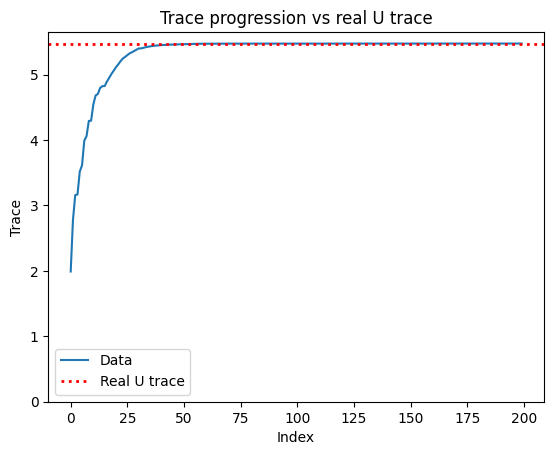

In [6]:
traces, ubar, x_approx = svd.approx_svd(random_matrix, p, 200)

plt.plot(traces, label='Data')
aux = u.transpose() @ random_matrix @ vt.transpose()
true_energy = np.trace(aux[:p, :p])
# Add a dotted horizontal line at y = 2.2
plt.axhline(y=true_energy, color='red', linestyle='dotted', linewidth=2, label='Real U trace')

plt.ylim(bottom=min(0, traces.min()))

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Trace')
plt.title('Trace progression vs real U trace')
plt.legend()

# Show the plot
plt.show()

In [7]:
ubar

array([[-0.6077,  0.4448, -0.3508, -0.5566],
       [-0.3444, -0.0607,  0.9049, -0.2428],
       [-0.5588, -0.7862, -0.2311,  0.1276],
       [-0.4471,  0.4248,  0.0688,  0.7842]])

In [ ]:
# ubar projection
print(ubar[:p, :] @ random_matrix)
print()
# true u projection
print(u[:p, :] @ random_matrix)


[[-0.1869 -0.8131 -0.8148 -0.7076 -0.2352 -0.1533 -0.0755 -0.9628 -0.26   -1.0699 -0.3948 -0.9995]
 [ 0.1592  0.3465 -0.2486  0.1411  0.4342 -0.1638  0.4952 -0.3825 -0.2481  0.4454  0.7732  0.249 ]
 [-0.9303 -0.8672 -0.5108 -0.5414 -0.4477 -0.4473 -0.5081 -0.6364 -0.7989 -0.6401 -0.4246 -0.9505]]

[[-0.1869 -0.8131 -0.8148 -0.7076 -0.2353 -0.1533 -0.0755 -0.9628 -0.26   -1.0699 -0.3948 -0.9995]
 [ 0.1592  0.3465 -0.2486  0.1411  0.4342 -0.1638  0.4952 -0.3825 -0.2481  0.4454  0.7732  0.2489]
 [-0.9303 -0.8672 -0.5108 -0.5414 -0.4477 -0.4473 -0.5081 -0.6364 -0.7989 -0.6401 -0.4246 -0.9505]]


# Validate Ubar
Extract mean from random matrix (to center it) and then project it with Ubar to functionally perform PCA (not sure)

In [76]:
from sklearn.decomposition import PCA
random_mean = np.mean(random_matrix, axis=1, keepdims=True)
random_centered = random_matrix - random_mean
_, ubar, _ = svd.approx_svd(random_centered, p, 200)
random_transposed = random_centered.transpose()

# PCA to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(random_transposed)

print(ubar[:p, :] @ random_centered)
print()
print(u[:p, :] @ random_matrix)
print()
print(X_pca.transpose())
print(np.linalg.norm(ubar[:p, :] @ random_matrix, 'fro'))
print(np.linalg.norm(u[:p, :] @ random_matrix, 'fro'))

[[0.     0.7406 0.524  0.3357 0.5282 0.5282 0.6207 0.5191 0.3065 0.38   0.6567 0.6169]
 [0.     0.     0.5696 0.4979 0.3154 0.373  0.3184 0.3207 0.4425 0.4234 0.3203 0.304 ]
 [0.     0.     0.     0.7354 0.6371 0.8761 0.6412 0.7783 0.8608 0.8504 0.8641 0.7443]]
[[ 0.1754 -0.2381 -0.3823 -0.1022  0.3274  0.0741  0.4407 -0.4879 -0.2634  0.0331  0.6366 -0.2133]
 [-0.2892  0.0096  0.1961  0.1071 -0.2477 -0.2556 -0.3747  0.3573 -0.3771  0.5138  0.045   0.3155]
 [ 0.3712 -0.2035 -0.0026 -0.1379 -0.2235  0.1585 -0.1568  0.2047  0.2198 -0.111  -0.2145  0.0955]]

[[-0.1869 -0.8131 -0.8148 -0.7076 -0.2353 -0.1533 -0.0755 -0.9628 -0.26   -1.0699 -0.3948 -0.9995]
 [ 0.1592  0.3465 -0.2486  0.1411  0.4342 -0.1638  0.4952 -0.3825 -0.2481  0.4454  0.7732  0.2489]
 [-0.9303 -0.8672 -0.5108 -0.5414 -0.4477 -0.4473 -0.5081 -0.6364 -0.7989 -0.6401 -0.4246 -0.9505]]

[[-0.253   0.1882  0.408   0.1234 -0.439  -0.2063 -0.5925  0.615   0.0175  0.2656 -0.5109  0.3839]
 [-0.2191  0.4288 -0.2272  0.0709  0.0664